<a href="https://colab.research.google.com/github/chaithrajaya/INTERSHIP-PROJECT/blob/main/desicion_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
from sklearn.tree import DecisionTreeClassifier

In [36]:
import pandas as pd
from google.colab import files

uploaded = files.upload()  # Manually upload 'desicion tree.csv'
df = pd.read_csv("desicion tree.csv")


Saving desicion tree.csv to desicion tree (3).csv


In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       21 non-null     int64  
 1   sex       21 non-null     int64  
 2   cp        21 non-null     int64  
 3   trestbps  21 non-null     int64  
 4   chol      21 non-null     int64  
 5   fbs       21 non-null     int64  
 6   restecg   21 non-null     int64  
 7   thalach   21 non-null     int64  
 8   exang     21 non-null     int64  
 9   oldpeak   21 non-null     float64
 10  slope     21 non-null     int64  
 11  ca        21 non-null     int64  
 12  thal      21 non-null     int64  
 13  target    21 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 2.4 KB


In [39]:
null_counts = df.isnull().sum()
null_counts

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [40]:
df = df.dropna()

In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,54.000000,0.761905,0.714286,132.571429,258.714286,0.142857,0.476190,150.000000,0.333333,1.247619,1.380952,0.523810,2.333333,0.428571
std,7.981228,0.436436,0.956183,15.177521,51.706037,0.358569,0.511766,22.821043,0.483046,1.018145,0.669043,0.813575,0.730297,0.507093
min,37.000000,0.000000,0.000000,112.000000,177.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,50.000000,1.000000,0.000000,120.000000,230.000000,0.000000,0.000000,132.000000,0.000000,0.500000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,250.000000,0.000000,0.000000,153.000000,0.000000,1.200000,1.000000,0.000000,2.000000,0.000000
75%,60.000000,1.000000,1.000000,140.000000,290.000000,0.000000,1.000000,165.000000,1.000000,2.200000,2.000000,1.000000,3.000000,1.000000
max,65.000000,1.000000,3.000000,172.000000,354.000000,1.000000,1.000000,187.000000,1.000000,3.500000,2.000000,3.000000,3.000000,1.000000


In [42]:
X=df.drop('target',axis=1)
y=df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
11,43,1,0,120,177,0,0,120,1,2.5,1,0,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
18,44,1,0,112,290,0,0,153,0,0.0,2,1,2
16,58,1,2,112,230,0,0,165,0,2.5,1,1,3


In [45]:
y_train.head()

,target
5,1
11,0
3,1
18,0
16,0


In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [47]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1])

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6

In [49]:
import pandas as pd

# Convert X_test to DataFrame with the same column names as X_train
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Now make predictions
predictions = model.predict(X_test_df)
print(predictions)


[1 1 1 1 1]


In [50]:
import pandas as pd

# Ensure column names match training data
columns = X_train.columns  # Use the same columns as training data

# Convert input into a DataFrame
input_data = pd.DataFrame([[55,1,0,132,353,0,1,132,1,1.2,1,1,3]], columns=columns)

# Predict using the model
prediction = model.predict(input_data)
print(prediction)


[0]


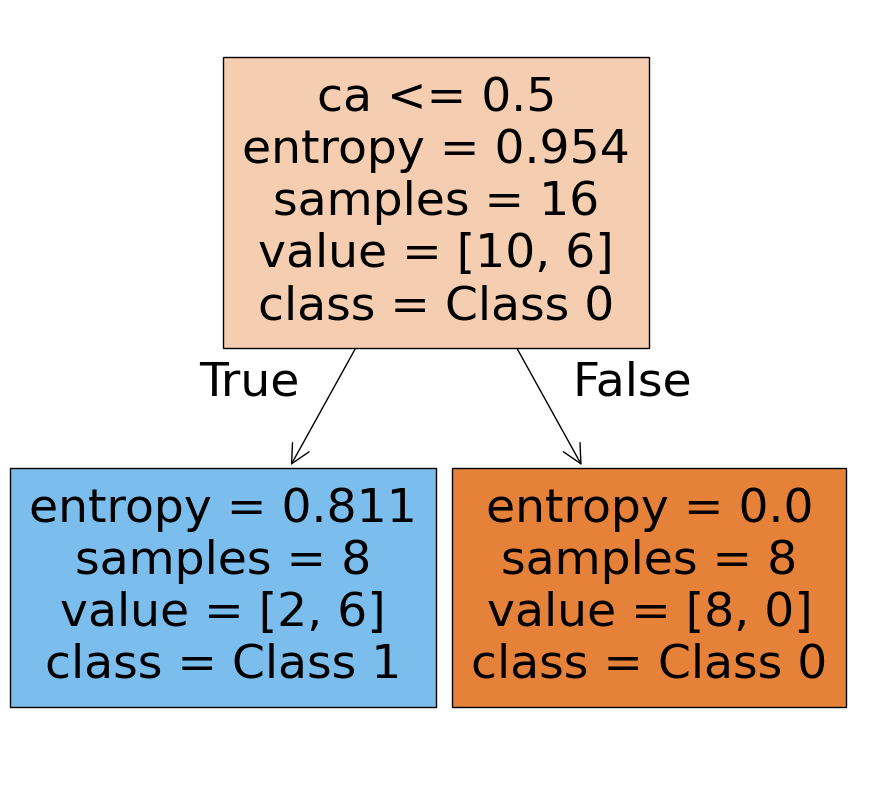

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 10))  # Adjust figure size for better readability
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.show()
